# 離散時間システムの解析

離散時間線形時不変システムの解析

- インパルス応答とその畳み込み
- 周波数特性（フーリエ級数展開、DTFTによる）
- 伝達関数（z変換による）
- 差分方程式システム
- 差分方程式システムの周波数特性
- 安定性と差分方程式システム

## 線形時不変システムと畳み込み

連続時間システムと同様に離散時間システムも、線形かつ時不変であれば、その出力応答は入力$u[n]$とインパルス応答$h[n]$の畳み込みで表現できる。

$$y[n]= \sum_{k=-\infty}^{n} u[k] h[n - k]$$

これは以下のように考えればいい。

入力信号をインパルスの列として表現する。

$$ u[n] = \sum_{k=-\infty}^{\infty} u[k] \delta[n - k] $$

時不変であるから、$\delta[n]$に対する応答が$h[n]$のとき、$\delta[n-k]$に対する応答は$h[n - k]$である。

システムの線形性から、

$$
\begin{eqnarray}
y[n] &=& S(u[n]) \\
     &=& \sum_{k=-\infty}^{\infty} u[k] S(\delta[n - k]) \\
     &=& \sum_{k=-\infty}^{\infty} u[k] h[n - k]
\end{eqnarray}
$$

がいえる。因果性システムなので、総和の区間は実際には以下で十分である。

$$y[n]= \sum_{k=-\infty}^{n} u[k] h[n - k]$$

## 周波数特性

### $e^{j \Omega n}$ に対する応答

$$
\begin{eqnarray}
y[n] &=& \sum_{k=-\infty}^{\infty} e^{j \Omega k} h[n - k] \\
     &=& \sum_{k=-\infty}^{\infty} e^{-j \Omega (n-k)} h[n - k] \cdot e^{j \Omega n} \\
     &=& H(\Omega) e^{j \Omega n}
\end{eqnarray}
$$

連続時間信号の場合と同様に、入力と出力で周波数が変わることはなく、振幅と位相のみが変化することを確認できた。

周期信号はフーリエ級数展開によって $e^{jk\omega_0 t}$ の級数で表現できるので、任意の周期信号についても同様の性質が成り立つ。

### 任意の入力信号に対する応答

線形時不変システムにおいて、出力は畳み込みで表せることが分かった。

$$ y[n] = h[n] \ast u[n]$$

ここで、畳み込み積分に関するDTFTの性質を用いると、

$$ Y(\Omega) = H(\Omega) U(\Omega)$$

がいえる。ここでも出力は、各周波数成分について入力の振幅と位相を変化させたものであることがわかる。

## 伝達関数

次に、システムをz変換で解析する。

z変換の畳み込みの性質を適用するには入力と出力とインパルス応答がすべて因果性信号である必要がある。因果性線形時不変システムでこれを満たすには、入力が$t<0$において$0$であればいい。このことを、システムが**静止状態**にあるという。

線形時不変システムにおいて、出力は畳み込みで表せる。

$$ y[n] = h[n] \ast u[n]$$

ここで、$h[n]$と$u[n]$が因果性信号のとき、ラプラス変換の畳み込みに関する性質より、以下が成り立つ：

$$y[n] = h[n] \ast u[n] \;\Longleftrightarrow\; Y(z) = H(z)U(z) $$

この $H(z)$ を伝達関数と呼ぶ。伝達関数は、システムが静止状態にあるときの、入力と出力のz変換の比である。

$$H(z) = \frac{Y(z)}{U(z)}$$

## 差分方程式システム

線形時不変離散時間システムの一般的な記述である**差分方程式**と、そのz変換による解析について述べる。

差分方程式システムとは、以下のようなシステムである。

$$y[k] + a_1 y[k-1] + \cdots + a_N y[k-N] = b_0 u[0] + b_1 u[1] + \cdots + b_M u[k-M]$$

つまり：

$$y[k] = - \sum_{n=1}^N a_n y[k - n] + \sum_{m=0}^M b_m u[k - m]$$

これは、出力$y[n]$が、直近の$N$個の出力と直近の$M+1$個の入力の線形和で決まることを意味している。

### 差分方程式システムのz変換による解析

$f[n-k]$のz変換が$z^{-k}F[z]$であることを利用すると、差分方程式システムのz変換は以下のようになる。

$$(1 + a_1 z^{-1} + \cdots + a_n z^{-N}) Y[z] = (b_0 + b_1 z^{-1} + \cdots + b_M z^{-M}) U(z)$$

つまり伝達関数$H(z)$は：

$$H(z) = \frac{b_0 + b_1 z^{-1} + \cdots + b_M z^{-M}}{1 + a_1 z^{-1} + \cdots + a_n z^{-N}} $$

有理関数$H(z)$から$h[n]$を求める方法は、逆z変換の節で紹介した。

### FIRシステムとIIRシステム

$a_i$がすべて$0$のとき、$H(z)$は以下のようになる：

$$H(z) = b_0 + b_1 z^{-1} + \cdots + b_M z^{-M}$$

である。このとき、$b_i$はインパルス応答そのものであることが分かる。つまり以下の通りである：

$$h[n] = b_i$$

このとき明らかにインパルス応答の長さは有限である。これをFIRシステム (Finite Impulse Response -)という。

また、$a_i$のうち、ひとつでも$0$でないものがあるとき、インパルス応答の長さは無限となる。これをIIRシステム (Infinite Impulse Response -) という。

## 差分方程式システムの周波数特性

差分方程式システムの伝達関数の分子と分母を１次因子の積に因数分解すると：

$$
\begin{eqnarray}
H(z) &=& \frac{b_0 + b_1 z^{-1} + b_2 z^{-2} +\cdots + b_M z^{-M}}{1 + a_1 z^{-1} + a_2 z^{-2} +\cdots + a_N z^{-N}} \\
     &=& \frac{b_0 (1-\sigma_1 z^{-1}) (1-\sigma_2 z^{-1}) \cdots (1-\sigma_M z^{-1})}{(1-\lambda_1 z^{-1}) (1-\lambda_2 z^{-1}) \cdots (1-\lambda_N z^{-1})}
\end{eqnarray}
$$

したがって周波数特性は：

$$
H(e^{j\Omega}) = \frac{b_0 (1-\sigma_1 e^{-j\Omega}) (1-\sigma_2 e^{-j\Omega}) \cdots (1-\sigma_M e^{-j\Omega})}{(1-\lambda_1 e^{-j\Omega}) (1-\lambda_2 e^{-j\Omega}) \cdots (1-\lambda_N e^{-j\Omega})}
$$

ここで、$\lambda_i$を極、$\sigma_i$を零点という。

z変換の議論で明らかなように、z平面の単位円周上の値 $H(z)|_{z=e^{j\Omega}}$ がシステムの周波数特性を与える。

**１次因子 $(1-\sigma_i e^{-j\Omega})$ のとらえ方**

- $\sigma_i e^{-j\Omega}$ は、半径 $|\sigma_i|$ の円周上を回転する点である。$\Omega = \arg(\sigma_i)$ のときに、実軸に最も近づく。
- $(1-\sigma_i e^{-j\Omega})$は、その円周上の点から、実軸上の点 $1$ までを結ぶベクターである。

### 振幅特性

$$
|H(e^{j\Omega})| = \frac{|b_0| |1-\sigma_1 e^{-j\Omega}| |1-\sigma_2 e^{-j\Omega}| \cdots |1-\sigma_M e^{-j\Omega}|}{|1-\lambda_1 e^{-j\Omega}| |1-\lambda_2 e^{-j\Omega}| \cdots |1-\lambda_N e^{-j\Omega}|}
$$

一次要素 $|1-\sigma_1 e^{-j\Omega}|$ は、半径 $|\sigma_i|$ の円周上を回転する点と、実軸上の点 $1$ との長さである。

### 位相特性

$$
\arg(H(e^{j\Omega})) = \sum^M \arg(1-\sigma_i e^{-j\Omega}) - \sum^N \arg(1-\lambda_i e^{-j\Omega})
$$

$ arg(1-\sigma_1 e^{-j\Omega})$ は、半径 $|\sigma_i|$ の円周上を回転する点から、実軸上の点 $1$ への偏角である。

### 群遅延特性

$$
\begin{eqnarray}
\tau(\Omega) &=& -\frac{d}{d\Omega} \arg(H(e^{j\Omega})) \\
&=& -\sum^M \frac{d}{d\Omega} \arg(1-\sigma_i e^{-j\Omega}) + \sum^N \frac{d}{d\Omega} \arg(1-\lambda_i e^{-j\Omega})
\end{eqnarray}
$$

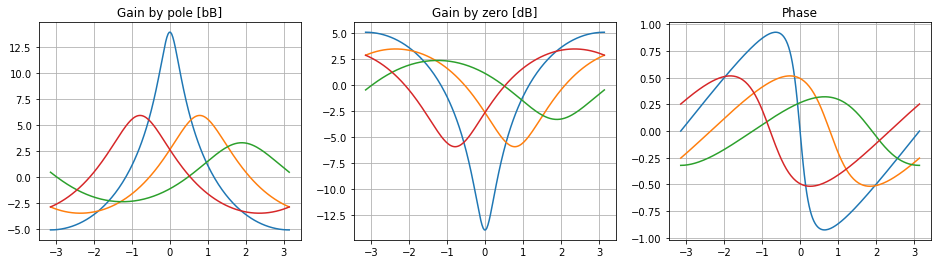

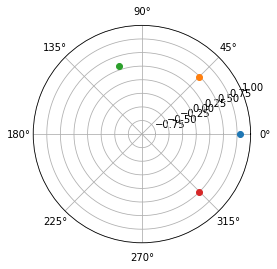

In [100]:
# 各１次因子の影響

import matplotlib.pyplot as plt
import numpy as np

_, (pole_ax, zero_ax, phase_ax) = plt.subplots(ncols=3, figsize=(16,4))

pole_ax.grid()
zero_ax.grid()
phase_ax.grid()
pole_ax.set_title('Gain by pole [bB]')
zero_ax.set_title('Gain by zero [dB]')
phase_ax.set_title('Phase')

omega = np.linspace(-np.pi, np.pi, 200)
pos = [0.8, 0.35+0.35j, -0.1+0.3j, 0.35-0.35j]

for polezero in pos:
    H = 1 - polezero * np.exp(-1j * omega)
    pole_ax.plot(omega, 20 * np.log10(np.abs(1 / H)))
    zero_ax.plot(omega, 20 * np.log10(np.abs(H)))
    phase_ax.plot(omega, np.angle(1 / H))
    
plt.figure()
ax = plt.subplot(111, projection="polar")
ax.set_ylim(-1, 1)
for polezero in pos:
    ax.plot(np.angle(polezero), np.abs(polezero), 'o')

### 全域通過システム

一次伝達関数の極を$\lambda$、零を$\overline{\lambda}^{-1}$に置く。このとき、極と零は、単位円の円周に対して鏡像関係にある。

$$H(z) = \frac{1}{|\lambda|} \cdot \frac{1-\overline{\lambda}^{-1}z^{-1}}{1-\lambda z^{-1}}$$

このとき、振幅特性は $|H(z)|=1$ となる：

$$|H(z)|^2 = H(z) \overline{H(z)} = 1$$

すべての周波数に対して振幅を変化させない。ただし位相は変わる。

## 安定性

離散時間線形時不変システムのインパルス応答が次の条件を満たすとき、システムは安定である。

「$ \sum_0^\infty |h[n]|$ が有限である」


### 差分方程式システムの安定性

有理多項式の伝達関数において、上記の条件は以下と等価である（ただし分子と分母に共通の根がないものとする）。

「全ての極について $|\lambda_i| < 1$ である」

これは部分分数分解についての逆z変換の結果を見れば明らかである。